In [95]:
import pandas as pd

men_employment_path = '/Users/zionlawrence/Documents/CFG_data_science_project/MEN employment by industry  - Men.csv'
women_employment_path = '/Users/zionlawrence/Documents/CFG_data_science_project/WOMEN employment by industry - Women.csv'

men_employment_data = pd.read_csv(men_employment_path)
women_employment_data = pd.read_csv(women_employment_path)

print("Men Employment Data:")
print(men_employment_data.head())

print("\nWomen Employment Data:")
print(women_employment_data.head())

Men Employment Data:
  EMP13:  All in employment by industry: Men (not seasonally adjusted)   \
0                               Date of publication:                      
1                                 Inquiries: Email:                       
2                                                NaN                      
3                                                NaN                      
4                                                NaN                      

                                       Unnamed: 1  \
0                      Tuesday, November 12, 2024   
1                       labour.supply@ons.gov.uk    
2                                             NaN   
3  Standard Industrial Classification (SIC) 20071   
4                              All in employment2   

                                          Unnamed: 2      Unnamed: 3  \
0                                                NaN             NaN   
1                                                NaN             

In [1]:
men_employment_data_clean = men_employment_data[5:]
women_employment_data_clean = women_employment_data[5:]

men_employment_data_clean.columns = men_employment_data_clean.iloc[0]
women_employment_data_clean.columns = women_employment_data_clean.iloc[0]

men_employment_data_clean = men_employment_data_clean[1:].reset_index(drop=True)
women_employment_data_clean = women_employment_data_clean[1:].reset_index(drop=True)

print("Men Employment Data (after skipping metadata):")
print(men_employment_data_clean.head())

print("\nWomen Employment Data (after skipping metadata):")
print(women_employment_data_clean.head())

NameError: name 'men_employment_data' is not defined

In [97]:
men_employment_data_clean = men_employment_data_clean.dropna(how='all', axis=1).dropna(how='all', axis=0)
women_employment_data_clean = women_employment_data_clean.dropna(how='all', axis=1).dropna(how='all', axis=0)

men_employment_data_clean.replace('..', pd.NA, inplace=True)
women_employment_data_clean.replace('..', pd.NA, inplace=True)

men_employment_data_clean.rename(columns={men_employment_data_clean.columns[0]: 'Date'}, inplace=True)
women_employment_data_clean.rename(columns={women_employment_data_clean.columns[0]: 'Date'}, inplace=True)

print("Men Employment Data (cleaned):")
print(men_employment_data_clean.head())

print("\nWomen Employment Data (cleaned):")
print(women_employment_data_clean.head())

Men Employment Data (cleaned):
5          Date    Date  Date  Date     A B, D, E     C     F     G     H  \
2  Jan-Mar 1995  13,941  <NA>  <NA>  <NA>    <NA>  <NA>  <NA>  <NA>  <NA>   
3  Apr-Jun 1995  14,066  <NA>  <NA>  <NA>    <NA>  <NA>  <NA>  <NA>  <NA>   
4  Jul-Sep 1995  14,235  <NA>  <NA>  <NA>    <NA>  <NA>  <NA>  <NA>  <NA>   
5  Oct-Dec 1995  14,187  <NA>  <NA>  <NA>    <NA>  <NA>  <NA>  <NA>  <NA>   
6  Jan-Mar 1996  14,041  <NA>  <NA>  <NA>    <NA>  <NA>  <NA>  <NA>  <NA>   

5     I     J     K     L     M     N     O     P     Q R, S, T  
2  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>    <NA>  
3  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>    <NA>  
4  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>    <NA>  
5  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>    <NA>  
6  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>    <NA>  

Women Employment Data (cleaned):
5          Date    Date  Date  Date     A B, D, E     C     F     G     H  \

In [98]:
print(men_employment_data_clean.columns)
print(women_employment_data_clean.columns)

Index(['Date', 'Date', 'Date', 'Date', 'A', 'B, D, E', 'C', 'F', 'G', 'H', 'I',
       'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R, S, T'],
      dtype='object', name=5)
Index(['Date', 'Date', 'Date', 'Date', 'A', 'B, D, E', 'C', 'F', 'G', 'H', 'I',
       'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R, S, T'],
      dtype='object', name=5)


In [99]:
men_employment_data_clean.columns = [f"Col_{i}" for i in range(len(men_employment_data_clean.columns))]
women_employment_data_clean.columns = [f"Col_{i}" for i in range(len(women_employment_data_clean.columns))]

print(men_employment_data_clean.head())
print(women_employment_data_clean.head())

men_employment_data_clean.rename(columns={"Col_0": "Date"}, inplace=True)
women_employment_data_clean.rename(columns={"Col_0": "Date"}, inplace=True)

men_employment_data_clean = men_employment_data_clean[['Date'] + list(men_employment_data_clean.columns[1:])]
women_employment_data_clean = women_employment_data_clean[['Date'] + list(women_employment_data_clean.columns[1:])]

men_employment_data_clean['Date'] = men_employment_data_clean['Date'].astype(str)
women_employment_data_clean['Date'] = women_employment_data_clean['Date'].astype(str)

men_employment_data_clean = men_employment_data_clean[
    men_employment_data_clean['Date'].str.contains('2018|2019|2020|2021|2022|2023|2024', na=False)
]
women_employment_data_clean = women_employment_data_clean[
    women_employment_data_clean['Date'].str.contains('2018|2019|2020|2021|2022|2023|2024', na=False)
]

men_employment_data_clean.reset_index(drop=True, inplace=True)
women_employment_data_clean.reset_index(drop=True, inplace=True)

print("Men Employment Data (2018-2024):")
print(men_employment_data_clean)

print("\nWomen Employment Data (2018-2024):")
print(women_employment_data_clean)


          Col_0   Col_1 Col_2 Col_3 Col_4 Col_5 Col_6 Col_7 Col_8 Col_9  \
2  Jan-Mar 1995  13,941  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
3  Apr-Jun 1995  14,066  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
4  Jul-Sep 1995  14,235  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
5  Oct-Dec 1995  14,187  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
6  Jan-Mar 1996  14,041  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

  Col_10 Col_11 Col_12 Col_13 Col_14 Col_15 Col_16 Col_17 Col_18 Col_19  
2   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  
3   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  
4   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  
5   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  
6   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>   <NA>  
          Col_0   Col_1 Col_2 Col_3 Col_4 Col_5 Col_6 Col_7 Col_8 Col_9  \
2  Jan-Mar 1995  11,576  <NA> 

In [100]:
print(men_employment_data_clean.info())
print(women_employment_data_clean.info())

print(men_employment_data_clean.head())
print(women_employment_data_clean.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    29 non-null     object
 1   Col_1   27 non-null     object
 2   Col_2   27 non-null     object
 3   Col_3   27 non-null     object
 4   Col_4   27 non-null     object
 5   Col_5   27 non-null     object
 6   Col_6   27 non-null     object
 7   Col_7   27 non-null     object
 8   Col_8   27 non-null     object
 9   Col_9   27 non-null     object
 10  Col_10  27 non-null     object
 11  Col_11  27 non-null     object
 12  Col_12  27 non-null     object
 13  Col_13  27 non-null     object
 14  Col_14  27 non-null     object
 15  Col_15  27 non-null     object
 16  Col_16  27 non-null     object
 17  Col_17  27 non-null     object
 18  Col_18  27 non-null     object
 19  Col_19  27 non-null     object
dtypes: object(20)
memory usage: 4.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entrie

In [101]:
print(men_employment_data.head())
print(women_employment_data.head())

  EMP13:  All in employment by industry: Men (not seasonally adjusted)   \
0                               Date of publication:                      
1                                 Inquiries: Email:                       
2                                                NaN                      
3                                                NaN                      
4                                                NaN                      

                                       Unnamed: 1  \
0                      Tuesday, November 12, 2024   
1                       labour.supply@ons.gov.uk    
2                                             NaN   
3  Standard Industrial Classification (SIC) 20071   
4                              All in employment2   

                                          Unnamed: 2      Unnamed: 3  \
0                                                NaN             NaN   
1                                                NaN             NaN   
2  United King

In [102]:
men_headers = men_employment_data.iloc[4]
women_headers = women_employment_data.iloc[4]

men_employment_data_clean.columns = men_headers
women_employment_data_clean.columns = women_headers

men_employment_data_clean = men_employment_data_clean[5:]
women_employment_data_clean = women_employment_data_clean[5:]

men_employment_data_clean.reset_index(drop=True, inplace=True)
women_employment_data_clean.reset_index(drop=True, inplace=True)

print(men_employment_data_clean.head())
print(women_employment_data_clean.head())


4           NaN All in employment2 Public sector3 Private sector  \
0  Apr-Jun 2019             17,217          2,362         14,793   
1  Jul-Sep 2019             17,341          2,389         14,890   
2  Oct-Dec 2019             17,368          2,447         14,856   
3  Jan-Mar 2020             17,259          2,444         14,741   
4  Apr-Jun 2020             17,020          2,522         14,420   

4 Agriculture, forestry & fishing Mining, energy and water supply  \
0                             254                             420   
1                             257                             431   
2                             251                             414   
3                             234                             416   
4                             208                             439   

4 Manufacturing Construction Wholesale, retail & repair of motor vehicles  \
0         2,235        2,057                                        2,125   
1         2,215       

In [103]:
men_employment_data_clean.columns = men_employment_data_clean.columns.str.strip()
women_employment_data_clean.columns = women_employment_data_clean.columns.str.strip()

print(men_employment_data_clean.columns)
print(women_employment_data_clean.columns)

Index([                                              nan,
                                    'All in employment2',
                                        'Public sector3',
                                        'Private sector',
                       'Agriculture, forestry & fishing',
                       'Mining, energy and water supply',
                                         'Manufacturing',
                                          'Construction',
          'Wholesale, retail & repair of motor vehicles',
                                   'Transport & storage',
                        'Accommod-ation & food services',
                           'Information & communication',
                      'Financial & insurance activities',
                                'Real estate activities',
       'Professional, scientific & technical activities',
                     'Administrative & support services',
               'Public admin & defence; social security',
              

In [104]:
numeric_columns = men_employment_data_clean.columns[1:]

men_employment_data_clean[numeric_columns] = men_employment_data_clean[numeric_columns].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
women_employment_data_clean[numeric_columns] = women_employment_data_clean[numeric_columns].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

print(men_employment_data_clean.dtypes)
print(women_employment_data_clean.dtypes)

4
NaN                                                 object
All in employment2                                 float64
Public sector3                                     float64
Private sector                                     float64
Agriculture, forestry & fishing                    float64
Mining, energy and water supply                    float64
Manufacturing                                      float64
Construction                                       float64
Wholesale, retail & repair of motor vehicles       float64
Transport & storage                                float64
Accommod-ation & food services                     float64
Information & communication                        float64
Financial & insurance activities                   float64
Real estate activities                             float64
Professional, scientific & technical activities    float64
Administrative & support services                  float64
Public admin & defence; social security            flo

In [105]:
men_employment_data_clean.loc[:, numeric_columns] = (
    men_employment_data_clean[numeric_columns]
    .replace(',', '', regex=True)
    .apply(pd.to_numeric, errors='coerce')
)

women_employment_data_clean.loc[:, numeric_columns] = (
    women_employment_data_clean[numeric_columns]
    .replace(',', '', regex=True)
    .apply(pd.to_numeric, errors='coerce')
)

print(men_employment_data_clean.dtypes)
print(women_employment_data_clean.dtypes)

4
NaN                                                 object
All in employment2                                 float64
Public sector3                                     float64
Private sector                                     float64
Agriculture, forestry & fishing                    float64
Mining, energy and water supply                    float64
Manufacturing                                      float64
Construction                                       float64
Wholesale, retail & repair of motor vehicles       float64
Transport & storage                                float64
Accommod-ation & food services                     float64
Information & communication                        float64
Financial & insurance activities                   float64
Real estate activities                             float64
Professional, scientific & technical activities    float64
Administrative & support services                  float64
Public admin & defence; social security            flo

In [106]:
print(men_employment_data_clean.columns)
print(women_employment_data_clean.columns)

Index([                                              nan,
                                    'All in employment2',
                                        'Public sector3',
                                        'Private sector',
                       'Agriculture, forestry & fishing',
                       'Mining, energy and water supply',
                                         'Manufacturing',
                                          'Construction',
          'Wholesale, retail & repair of motor vehicles',
                                   'Transport & storage',
                        'Accommod-ation & food services',
                           'Information & communication',
                      'Financial & insurance activities',
                                'Real estate activities',
       'Professional, scientific & technical activities',
                     'Administrative & support services',
               'Public admin & defence; social security',
              

In [107]:
print(men_employment_data_clean.head())
print(women_employment_data_clean.head())

4           NaN  All in employment2  Public sector3  Private sector  \
0  Apr-Jun 2019             17217.0          2362.0         14793.0   
1  Jul-Sep 2019             17341.0          2389.0         14890.0   
2  Oct-Dec 2019             17368.0          2447.0         14856.0   
3  Jan-Mar 2020             17259.0          2444.0         14741.0   
4  Apr-Jun 2020             17020.0          2522.0         14420.0   

4  Agriculture, forestry & fishing  Mining, energy and water supply  \
0                            254.0                            420.0   
1                            257.0                            431.0   
2                            251.0                            414.0   
3                            234.0                            416.0   
4                            208.0                            439.0   

4  Manufacturing  Construction  Wholesale, retail & repair of motor vehicles  \
0         2235.0        2057.0                                    

In [108]:
men_employment_data_clean.columns = men_employment_data_clean.columns.str.strip()
women_employment_data_clean.columns = women_employment_data_clean.columns.str.strip()

In [109]:
men_employment_data_clean = men_employment_data_clean.copy()
women_employment_data_clean = women_employment_data_clean.copy()

men_employment_data_clean.rename(columns={'Correct_Column_Name': 'Date'}, inplace=True)
women_employment_data_clean.rename(columns={'Correct_Column_Name': 'Date'}, inplace=True)

print(men_employment_data_clean.columns)
print(women_employment_data_clean.columns)


Index([                                              nan,
                                    'All in employment2',
                                        'Public sector3',
                                        'Private sector',
                       'Agriculture, forestry & fishing',
                       'Mining, energy and water supply',
                                         'Manufacturing',
                                          'Construction',
          'Wholesale, retail & repair of motor vehicles',
                                   'Transport & storage',
                        'Accommod-ation & food services',
                           'Information & communication',
                      'Financial & insurance activities',
                                'Real estate activities',
       'Professional, scientific & technical activities',
                     'Administrative & support services',
               'Public admin & defence; social security',
              

In [110]:
men_employment_data_clean.rename(columns={'Correct_Column_Name': 'Date'}, inplace=True)
women_employment_data_clean.rename(columns={'Correct_Column_Name': 'Date'}, inplace=True)

In [111]:
men_employment_data_clean.rename(columns={men_employment_data_clean.columns[0]: 'Date'}, inplace=True)
women_employment_data_clean.rename(columns={women_employment_data_clean.columns[0]: 'Date'}, inplace=True)

print(men_employment_data_clean.columns)
print(women_employment_data_clean.columns)

Index(['Date', 'All in employment2', 'Public sector3', 'Private sector',
       'Agriculture, forestry & fishing', 'Mining, energy and water supply',
       'Manufacturing', 'Construction',
       'Wholesale, retail & repair of motor vehicles', 'Transport & storage',
       'Accommod-ation & food services', 'Information & communication',
       'Financial & insurance activities', 'Real estate activities',
       'Professional, scientific & technical activities',
       'Administrative & support services',
       'Public admin & defence; social security', 'Education',
       'Human health & social work activities', 'Other services'],
      dtype='object', name=4)
Index(['Date', 'All in employment2', 'Public sector3', 'Private sector',
       'Agriculture, forestry & fishing', 'Mining, energy and water supply',
       'Manufacturing', 'Construction',
       'Wholesale, retail & repair of motor vehicles', 'Transport & storage',
       'Accommod-ation & food services', 'Information & commu

In [112]:
filtered_men_data = men_employment_data_clean[
    men_employment_data_clean['Date'].str.contains('2018|2019|2020|2021|2022|2023|2024', na=False)
]

filtered_women_data = women_employment_data_clean[
    women_employment_data_clean['Date'].str.contains('2018|2019|2020|2021|2022|2023|2024', na=False)
]

filtered_men_data.reset_index(drop=True, inplace=True)
filtered_women_data.reset_index(drop=True, inplace=True)

print(filtered_men_data.head())
print(filtered_women_data.head())

4          Date  All in employment2  Public sector3  Private sector  \
0  Apr-Jun 2019             17217.0          2362.0         14793.0   
1  Jul-Sep 2019             17341.0          2389.0         14890.0   
2  Oct-Dec 2019             17368.0          2447.0         14856.0   
3  Jan-Mar 2020             17259.0          2444.0         14741.0   
4  Apr-Jun 2020             17020.0          2522.0         14420.0   

4  Agriculture, forestry & fishing  Mining, energy and water supply  \
0                            254.0                            420.0   
1                            257.0                            431.0   
2                            251.0                            414.0   
3                            234.0                            416.0   
4                            208.0                            439.0   

4  Manufacturing  Construction  Wholesale, retail & repair of motor vehicles  \
0         2235.0        2057.0                                    

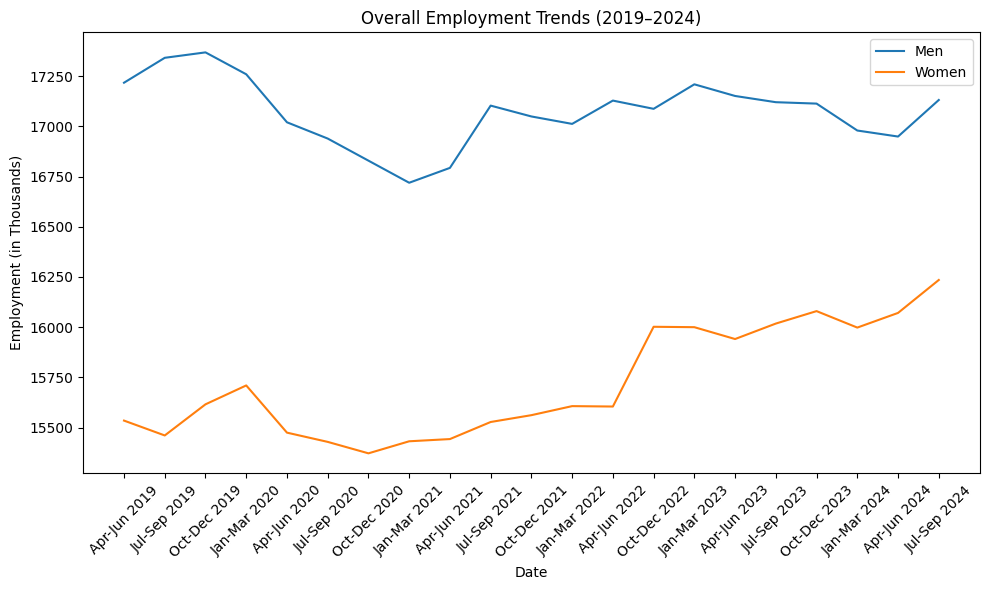

In [151]:
#OVERALL EMPLOYMENT TRENDS MEN AND WOMEN

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(filtered_men_data['Date'], filtered_men_data['All in employment2'], label='Men')
plt.plot(filtered_women_data['Date'], filtered_women_data['All in employment2'], label='Women')
plt.title('Overall Employment Trends (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Employment (in Thousands)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [114]:
print(filtered_men_data['Date'].unique())

['Apr-Jun 2019' 'Jul-Sep 2019' 'Oct-Dec 2019' 'Jan-Mar 2020'
 'Apr-Jun 2020' 'Jul-Sep 2020' 'Oct-Dec 2020' 'Jan-Mar 2021'
 'Apr-Jun 2021' 'Jul-Sep 2021' 'Oct-Dec 2021' 'Jan-Mar 2022'
 'Apr-Jun 2022' 'Jul-Sep 20224' 'Oct-Dec 2022' 'Jan-Mar 2023'
 'Apr-Jun 2023' 'Jul-Sep 2023' 'Oct-Dec 2023' 'Jan-Mar 2024'
 'Apr-Jun 2024' 'Jul-Sep 2024'
 '4 Data from July to September 2022 onward has been reweighted, causing a step change discontinuity.'
 'Note: As the estimates are not seasonally adjusted, it is best practice to only compare the same quarter for different years (e.g., compare January-March 2018 with January-March 2019 but do not compare July-September 2018 with January-March 2019).']


In [ ]:
print(filtered_men_data.columns)

In [ ]:
# Corrected industries list
industries = [
    'Manufacturing', 
    'Human health & social work activities',  # Corrected name for healthcare
    'Wholesale, retail & repair of motor vehicles', 
    'Education'
]

# Visualization
plt.figure(figsize=(12, 8))
for industry in industries:
    plt.plot(filtered_men_data['Date'], filtered_men_data[industry], label=f'Men - {industry}')
    plt.plot(filtered_women_data['Date'], filtered_women_data[industry], label=f'Women - {industry}')

plt.title('Employment Trends by Sector (2018–2024)')
plt.xlabel('Date')
plt.ylabel('Employment (in Thousands)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Separate plots for men and women
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot for men
axes[0].plot(filtered_men_data['Date'], filtered_men_data['Manufacturing'], label='Manufacturing')
axes[0].plot(filtered_men_data['Date'], filtered_men_data['Human health & social work activities'], label='Healthcare')
axes[0].plot(filtered_men_data['Date'], filtered_men_data['Education'], label='Education')
axes[0].set_title("Men's Employment Trends")
axes[0].set_ylabel('Employment (in Thousands)')
axes[0].legend()

# Plot for women
axes[1].plot(filtered_women_data['Date'], filtered_women_data['Manufacturing'], label='Manufacturing')
axes[1].plot(filtered_women_data['Date'], filtered_women_data['Human health & social work activities'], label='Healthcare')
axes[1].plot(filtered_women_data['Date'], filtered_women_data['Education'], label='Education')
axes[1].set_title("Women's Employment Trends")
axes[1].set_ylabel('Employment (in Thousands)')
axes[1].set_xlabel('Date')
axes[1].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(filtered_men_data.columns)
print(filtered_women_data.columns)

In [116]:
def categorize_period(date):
    try:
        year = int(date.split(' ')[-1])
        if year in [2018, 2019]:
            return 'Pre-Pandemic'
        elif year in [2020, 2021]:
            return 'Pandemic'
        elif year in [2022, 2023, 2024]:
            return 'Post-Pandemic'
        else:
            return 'Unknown'
    except ValueError:
        return 'Invalid'

filtered_men_data['Period'] = filtered_men_data['Date'].apply(categorize_period)
filtered_women_data['Period'] = filtered_women_data['Date'].apply(categorize_period)

print(filtered_men_data[['Date', 'Period']].head())
print(filtered_women_data[['Date', 'Period']].head())

4          Date        Period
0  Apr-Jun 2019  Pre-Pandemic
1  Jul-Sep 2019  Pre-Pandemic
2  Oct-Dec 2019  Pre-Pandemic
3  Jan-Mar 2020      Pandemic
4  Apr-Jun 2020      Pandemic
4          Date        Period
0  Apr-Jun 2019  Pre-Pandemic
1  Jul-Sep 2019  Pre-Pandemic
2  Oct-Dec 2019  Pre-Pandemic
3  Jan-Mar 2020      Pandemic
4  Apr-Jun 2020      Pandemic


In [117]:
print(filtered_men_data.columns)
print(filtered_women_data.columns)

Index(['Date', 'All in employment2', 'Public sector3', 'Private sector',
       'Agriculture, forestry & fishing', 'Mining, energy and water supply',
       'Manufacturing', 'Construction',
       'Wholesale, retail & repair of motor vehicles', 'Transport & storage',
       'Accommod-ation & food services', 'Information & communication',
       'Financial & insurance activities', 'Real estate activities',
       'Professional, scientific & technical activities',
       'Administrative & support services',
       'Public admin & defence; social security', 'Education',
       'Human health & social work activities', 'Other services', 'Period'],
      dtype='object', name=4)
Index(['Date', 'All in employment2', 'Public sector3', 'Private sector',
       'Agriculture, forestry & fishing', 'Mining, energy and water supply',
       'Manufacturing', 'Construction',
       'Wholesale, retail & repair of motor vehicles', 'Transport & storage',
       'Accommod-ation & food services', 'Informati

In [118]:
# Plot overall employment trends for men and women
plt.figure(figsize=(10, 6)) is 
plt.plot(filtered_men_data['Date'], filtered_men_data['All in employment2'], label='Men')
plt.plot(filtered_women_data['Date'], filtered_women_data['All in employment2'], label='Women')
plt.title('Overall Employment Trends (2018–2024)')
plt.xlabel('Date')
plt.ylabel('Employment (in Thousands)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2371650485.py, line 2)

In [119]:
print(filtered_men_data.dtypes)

4
Date                                                object
All in employment2                                 float64
Public sector3                                     float64
Private sector                                     float64
Agriculture, forestry & fishing                    float64
Mining, energy and water supply                    float64
Manufacturing                                      float64
Construction                                       float64
Wholesale, retail & repair of motor vehicles       float64
Transport & storage                                float64
Accommod-ation & food services                     float64
Information & communication                        float64
Financial & insurance activities                   float64
Real estate activities                             float64
Professional, scientific & technical activities    float64
Administrative & support services                  float64
Public admin & defence; social security            flo

In [120]:
numeric_columns = filtered_men_data.select_dtypes(include='number').columns
men_grouped = filtered_men_data.groupby('Period')[numeric_columns].mean()
women_grouped = filtered_women_data.groupby('Period')[numeric_columns].mean()

print(men_grouped)
print(women_grouped)

4              All in employment2  Public sector3  Private sector  \
Period                                                              
Invalid                       NaN             NaN             NaN   
Pandemic             16963.875000     2624.750000    14279.375000   
Post-Pandemic        17087.900000     2758.100000    14251.800000   
Pre-Pandemic         17308.666667     2399.333333    14846.333333   
Unknown              17025.000000     2768.000000    14176.000000   

4              Agriculture, forestry & fishing  \
Period                                           
Invalid                                    NaN   
Pandemic                                 213.5   
Post-Pandemic                            201.6   
Pre-Pandemic                             254.0   
Unknown                                  173.0   

4              Mining, energy and water supply  Manufacturing  Construction  \
Period                                                                        
Invalid

In [121]:
filtered_men_data[numeric_columns] = filtered_men_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
filtered_women_data[numeric_columns] = filtered_women_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [160]:
men_grouped = filtered_men_data.groupby('Period')[numeric_columns].mean()
women_grouped = filtered_women_data.groupby('Period')[numeric_columns].mean()

print(men_grouped)
print(women_grouped)

4              All in employment2  Public sector3  Private sector  \
Period                                                              
Pandemic             16963.875000     2624.750000    14279.375000   
Post-Pandemic        17087.900000     2758.100000    14251.800000   
Pre-Pandemic         17308.666667     2399.333333    14846.333333   

4              Agriculture, forestry & fishing  \
Period                                           
Pandemic                                 213.5   
Post-Pandemic                            201.6   
Pre-Pandemic                             254.0   

4              Mining, energy and water supply  Manufacturing  Construction  \
Period                                                                        
Pandemic                            443.250000    2033.625000   1865.875000   
Post-Pandemic                       417.000000    1940.800000   1815.200000   
Pre-Pandemic                        421.666667    2235.666667   2044.333333   

4      

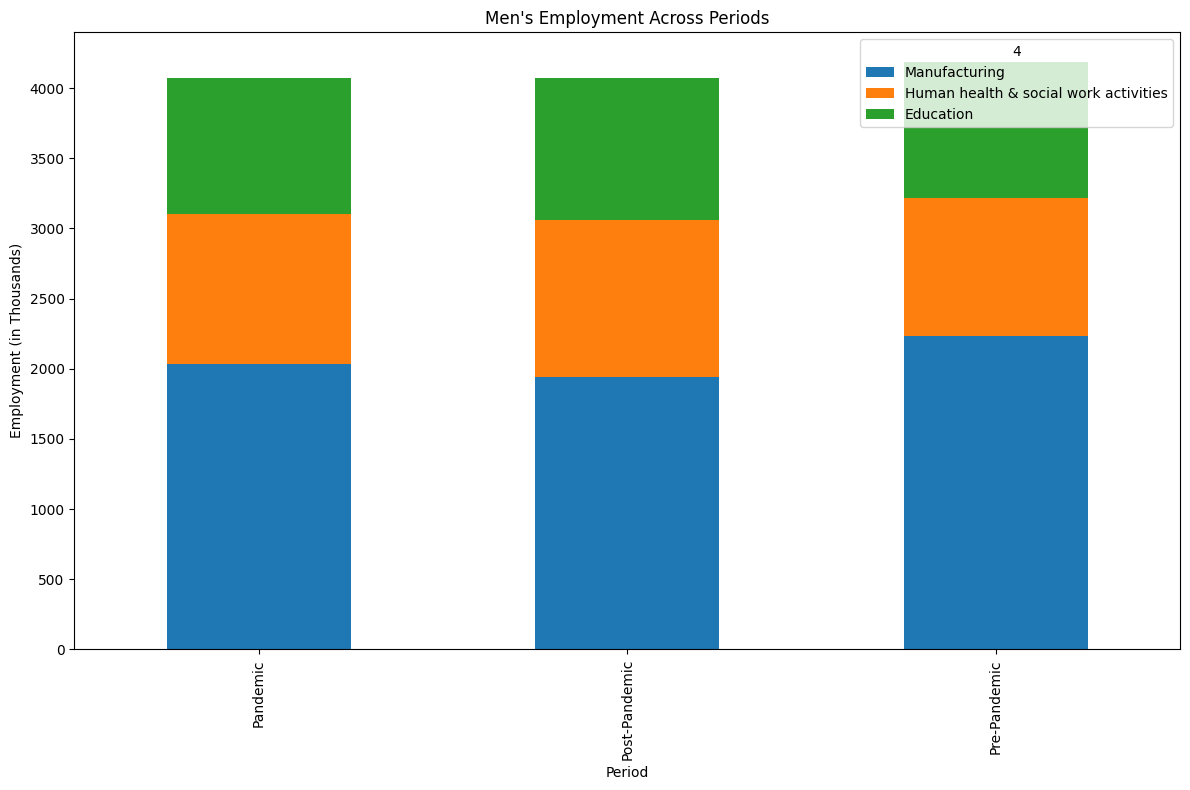

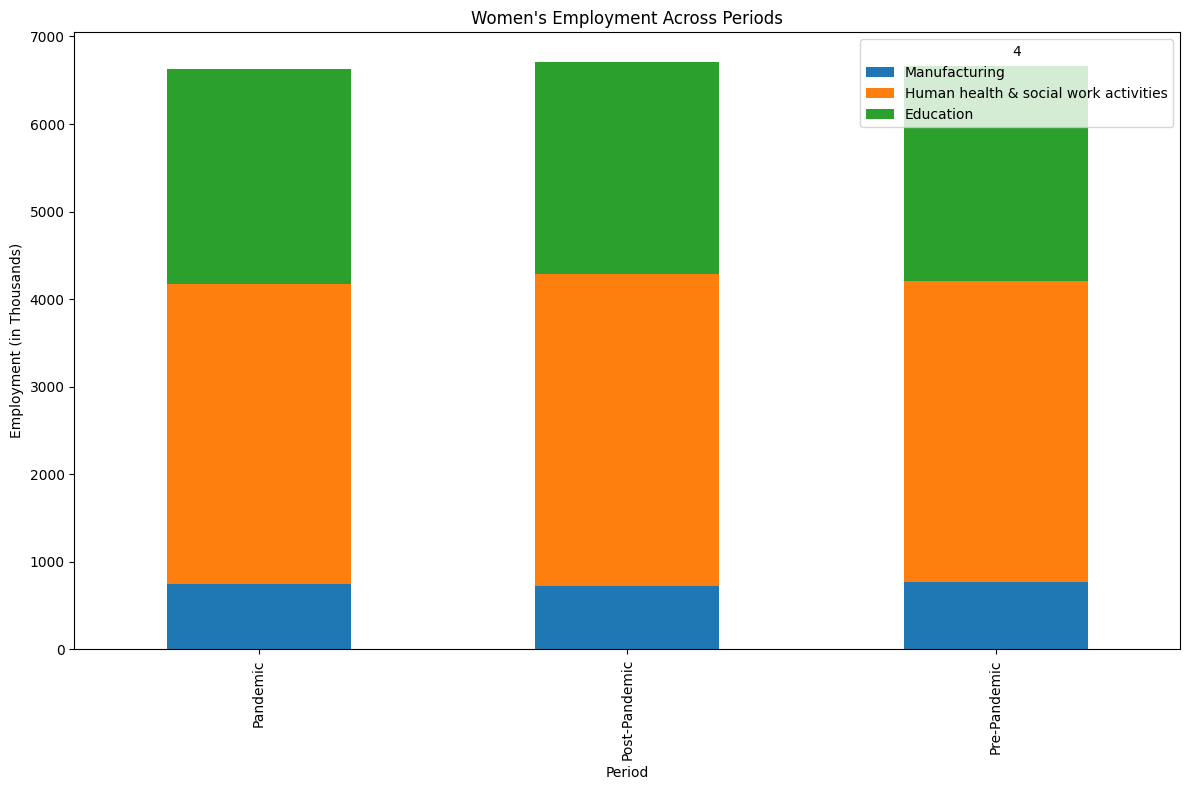

In [161]:
industries = ['Manufacturing', 'Human health & social work activities', 'Education']

men_grouped[industries].plot(kind='bar', stacked=True, figsize=(12, 8), title="Men's Employment Across Periods")
plt.ylabel('Employment (in Thousands)')
plt.xlabel('Period')
plt.tight_layout()
plt.show()

women_grouped[industries].plot(kind='bar', stacked=True, figsize=(12, 8), title="Women's Employment Across Periods")
plt.ylabel('Employment (in Thousands)')
plt.xlabel('Period')
plt.tight_layout()
plt.show()

In [162]:
print(filtered_men_data['Period'].unique())

['Pre-Pandemic' 'Pandemic' 'Post-Pandemic']


In [163]:
filtered_men_data = filtered_men_data[~filtered_men_data['Period'].isin(['Invalid', 'Unknown'])]
filtered_women_data = filtered_women_data[~filtered_women_data['Period'].isin(['Invalid', 'Unknown'])]

In [164]:
print(filtered_men_data['Period'].unique())

['Pre-Pandemic' 'Pandemic' 'Post-Pandemic']


In [165]:
period_order = ['Pre-Pandemic', 'Pandemic', 'Post-Pandemic']

filtered_men_data['Period'] = pd.Categorical(filtered_men_data['Period'], categories=period_order, ordered=True)
filtered_women_data['Period'] = pd.Categorical(filtered_women_data['Period'], categories=period_order, ordered=True)

In [166]:
filtered_men_data = filtered_men_data.copy()
filtered_women_data = filtered_women_data.copy()

In [167]:
period_order = ['Pre-Pandemic', 'Pandemic', 'Post-Pandemic']

filtered_men_data['Period'] = pd.Categorical(filtered_men_data['Period'], categories=period_order, ordered=True)
filtered_women_data['Period'] = pd.Categorical(filtered_women_data['Period'], categories=period_order, ordered=True)

In [168]:
print(filtered_men_data['Period'].unique())
print(filtered_women_data['Period'].unique())

['Pre-Pandemic', 'Pandemic', 'Post-Pandemic']
Categories (3, object): ['Pre-Pandemic' < 'Pandemic' < 'Post-Pandemic']
['Pre-Pandemic', 'Pandemic', 'Post-Pandemic']
Categories (3, object): ['Pre-Pandemic' < 'Pandemic' < 'Post-Pandemic']


In [169]:
numeric_columns = filtered_men_data.select_dtypes(include='number').columns

men_grouped = filtered_men_data.groupby('Period')[numeric_columns].mean()
women_grouped = filtered_women_data.groupby('Period')[numeric_columns].mean()

print(men_grouped)
print(women_grouped)

4              All in employment2  Public sector3  Private sector  \
Period                                                              
Pre-Pandemic         17308.666667     2399.333333    14846.333333   
Pandemic             16963.875000     2624.750000    14279.375000   
Post-Pandemic        17087.900000     2758.100000    14251.800000   

4              Agriculture, forestry & fishing  \
Period                                           
Pre-Pandemic                             254.0   
Pandemic                                 213.5   
Post-Pandemic                            201.6   

4              Mining, energy and water supply  Manufacturing  Construction  \
Period                                                                        
Pre-Pandemic                        421.666667    2235.666667   2044.333333   
Pandemic                            443.250000    2033.625000   1865.875000   
Post-Pandemic                       417.000000    1940.800000   1815.200000   

4      

/var/folders/r9/6p4s_33n7f3gzzh0k0s6jqfw0000gn/T/ipykernel_70048/1985426541.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  men_grouped = filtered_men_data.groupby('Period')[numeric_columns].mean()
/var/folders/r9/6p4s_33n7f3gzzh0k0s6jqfw0000gn/T/ipykernel_70048/1985426541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  women_grouped = filtered_women_data.groupby('Period')[numeric_columns].mean()


In [170]:
filtered_men_data[numeric_columns] = filtered_men_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
filtered_women_data[numeric_columns] = filtered_women_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

men_grouped = filtered_men_data.groupby('Period')[numeric_columns].mean()
women_grouped = filtered_women_data.groupby('Period')[numeric_columns].mean()

/var/folders/r9/6p4s_33n7f3gzzh0k0s6jqfw0000gn/T/ipykernel_70048/1653241541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  men_grouped = filtered_men_data.groupby('Period')[numeric_columns].mean()
/var/folders/r9/6p4s_33n7f3gzzh0k0s6jqfw0000gn/T/ipykernel_70048/1653241541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  women_grouped = filtered_women_data.groupby('Period')[numeric_columns].mean()


In [171]:
men_grouped = filtered_men_data.groupby('Period', observed=True)[numeric_columns].mean()
women_grouped = filtered_women_data.groupby('Period', observed=True)[numeric_columns].mean()

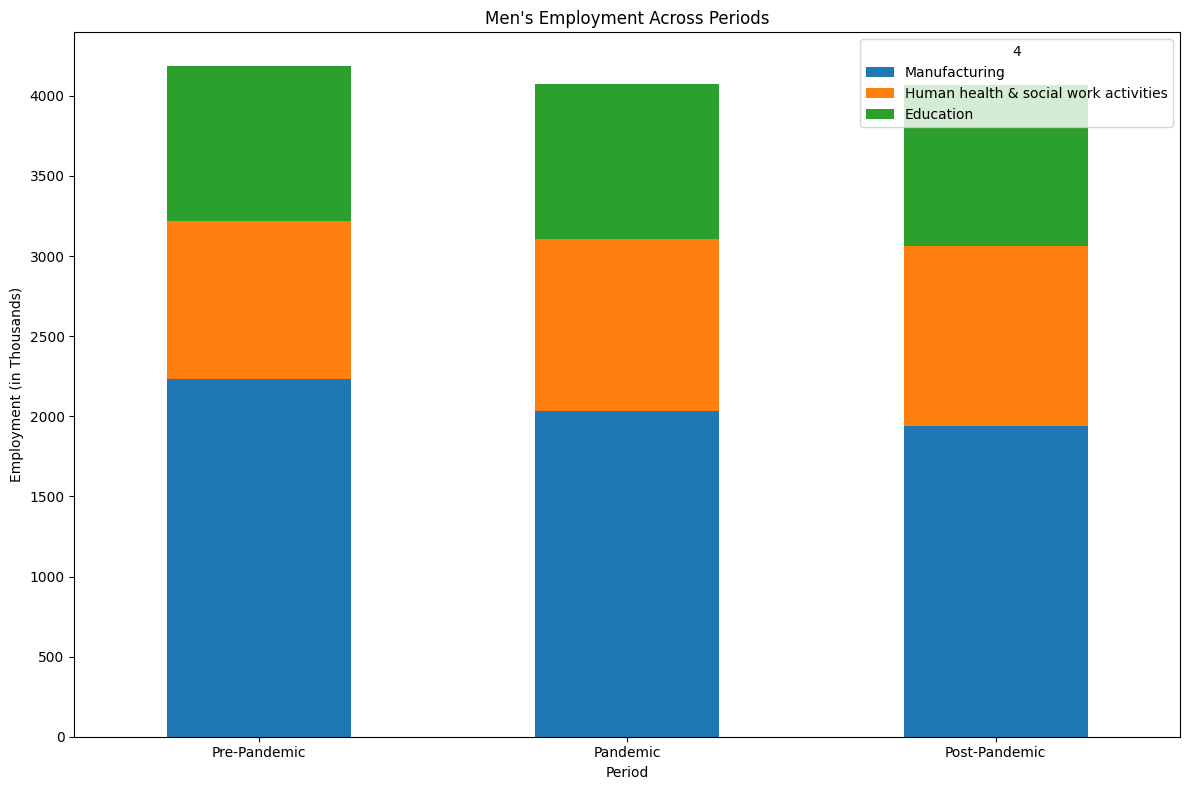

In [172]:
industries = ['Manufacturing', 'Human health & social work activities', 'Education']

ax = men_grouped[industries].plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8), 
    title="Men's Employment Across Periods"
)
ax.set_ylabel('Employment (in Thousands)')
ax.set_xlabel('Period')
ax.set_xticks(range(len(men_grouped.index)))
ax.set_xticklabels(men_grouped.index, rotation=0)  # Ensure labels are horizontal
plt.tight_layout()
plt.show()


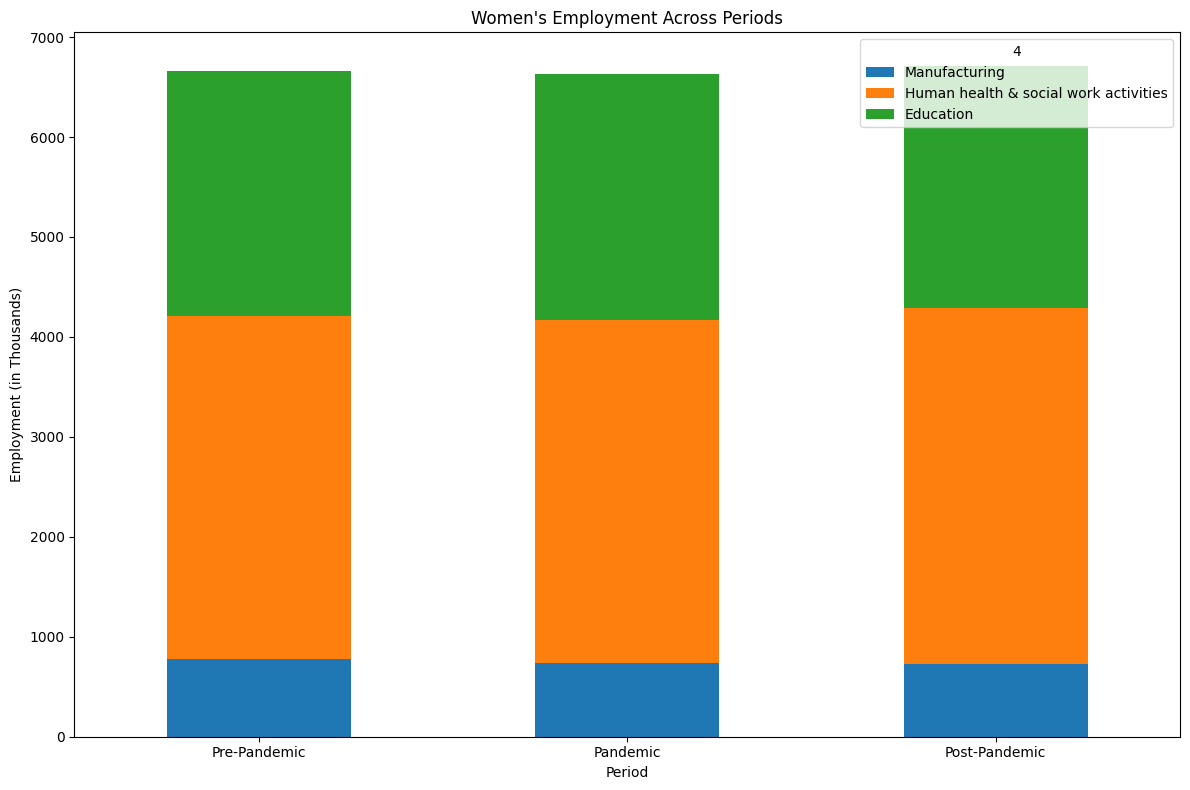

In [173]:
ax = women_grouped[industries].plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8), 
    title="Women's Employment Across Periods"
)
ax.set_ylabel('Employment (in Thousands)')
ax.set_xlabel('Period')
ax.set_xticks(range(len(women_grouped.index)))
ax.set_xticklabels(women_grouped.index, rotation=0)  # Ensure labels are horizontal
plt.tight_layout()
plt.show()

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

healthcare_men = filtered_men_data[['Period', 'Human health & social work activities']]
healthcare_women = filtered_women_data[['Period', 'Human health & social work activities']]

healthcare_men.rename(columns={'Human health & social work activities': 'Employment (Men)'}, inplace=True)
healthcare_women.rename(columns={'Human health & social work activities': 'Employment (Women)'}, inplace=True)

healthcare_combined = pd.merge(
    healthcare_men, 
    healthcare_women, 
    on='Period', 
    how='inner'
)

healthcare_combined['Total Employment'] = healthcare_combined['Employment (Men)'] + healthcare_combined['Employment (Women)']
healthcare_combined['Men (%)'] = (healthcare_combined['Employment (Men)'] / healthcare_combined['Total Employment']) * 100
healthcare_combined['Women (%)'] = (healthcare_combined['Employment (Women)'] / healthcare_combined['Total Employment']) * 100


print(healthcare_combined)

plt.figure(figsize=(10, 6))
periods = healthcare_combined['Period']
plt.bar(periods, healthcare_combined['Men (%)'], label='Men', color='blue')
plt.bar(periods, healthcare_combined['Women (%)'], bottom=healthcare_combined['Men (%)'], label='Women', color='orange')
plt.title('Proportion of Employment in Healthcare by Gender')
plt.xlabel('Period')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#piechart
for i, row in healthcare_combined.iterrows():
    plt.figure(figsize=(6, 6))
    plt.pie(
        [row['Men (%)'], row['Women (%)']], 
        labels=['Men', 'Women'], 
        autopct='%1.1f%%', 
        colors=['blue', 'orange']
    )
    plt.title(f'Proportion of Employment in Healthcare ({row["Period"]})')
    plt.show()

KeyError: "None of [Index(['Period', 'Human health & social work activities'], dtype='object')] are in the [columns]"

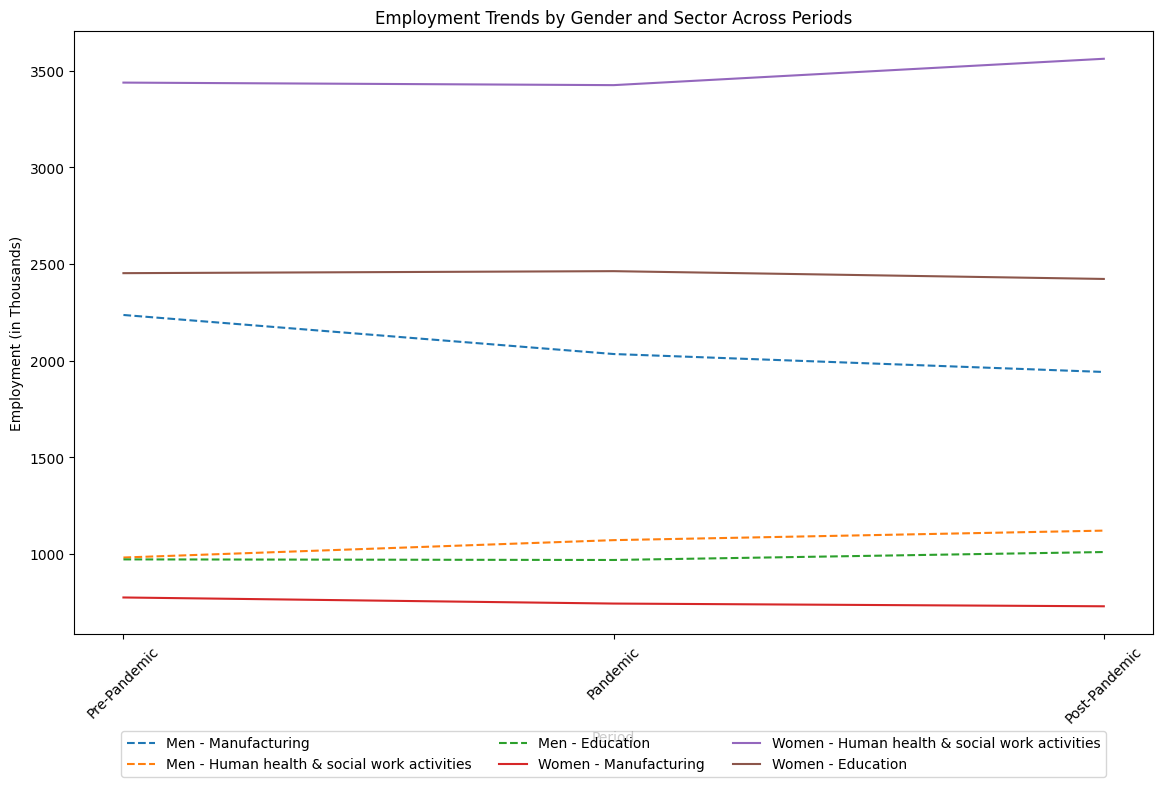

In [175]:
men_long = men_grouped.reset_index().melt(id_vars='Period', var_name='Industry', value_name='Employment')
women_long = women_grouped.reset_index().melt(id_vars='Period', var_name='Industry', value_name='Employment')

fig, ax = plt.subplots(figsize=(12, 8))

for industry in industries:
    subset = men_long[men_long['Industry'] == industry]
    ax.plot(subset['Period'], subset['Employment'], label=f'Men - {industry}', linestyle='--')

for industry in industries:
    subset = women_long[women_long['Industry'] == industry]
    ax.plot(subset['Period'], subset['Employment'], label=f'Women - {industry}')
    
ax.set_xlabel('Period')
ax.set_ylabel('Employment (in Thousands)')
ax.set_title('Employment Trends by Gender and Sector Across Periods')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

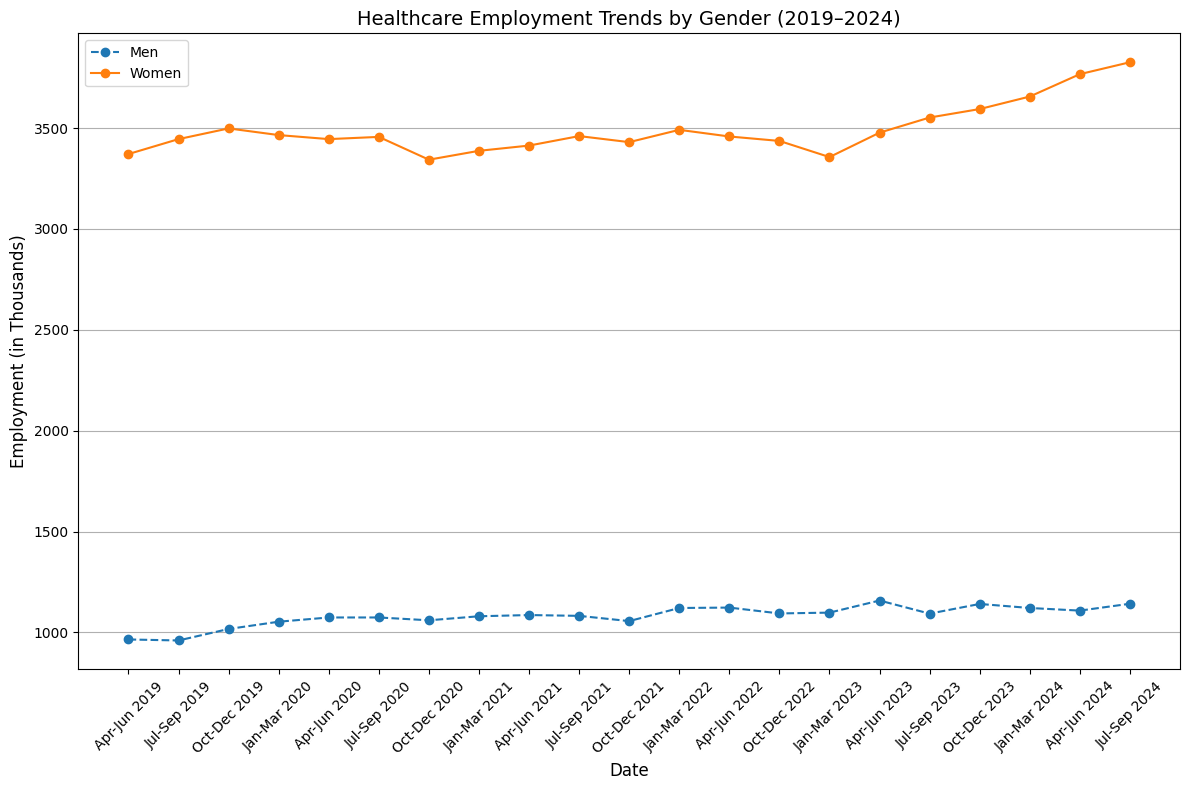

In [176]:
healthcare_men = filtered_men_data[['Date', 'Period', 'Human health & social work activities']].copy()
healthcare_women = filtered_women_data[['Date', 'Period', 'Human health & social work activities']].copy()


healthcare_men.rename(columns={'Human health & social work activities': 'Employment'}, inplace=True)
healthcare_women.rename(columns={'Human health & social work activities': 'Employment'}, inplace=True)


plt.figure(figsize=(12, 8))
plt.plot(healthcare_men['Date'], healthcare_men['Employment'], label='Men', linestyle='--', marker='o')
plt.plot(healthcare_women['Date'], healthcare_women['Employment'], label='Women', linestyle='-', marker='o')


plt.title('Healthcare Employment Trends by Gender (2019–2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Employment (in Thousands)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

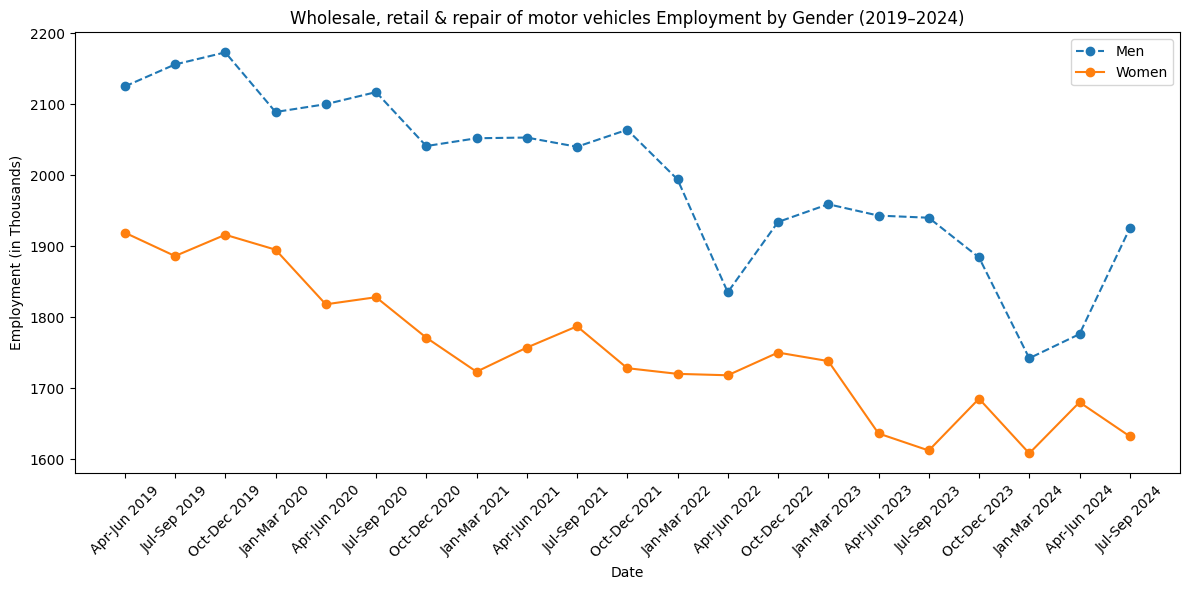

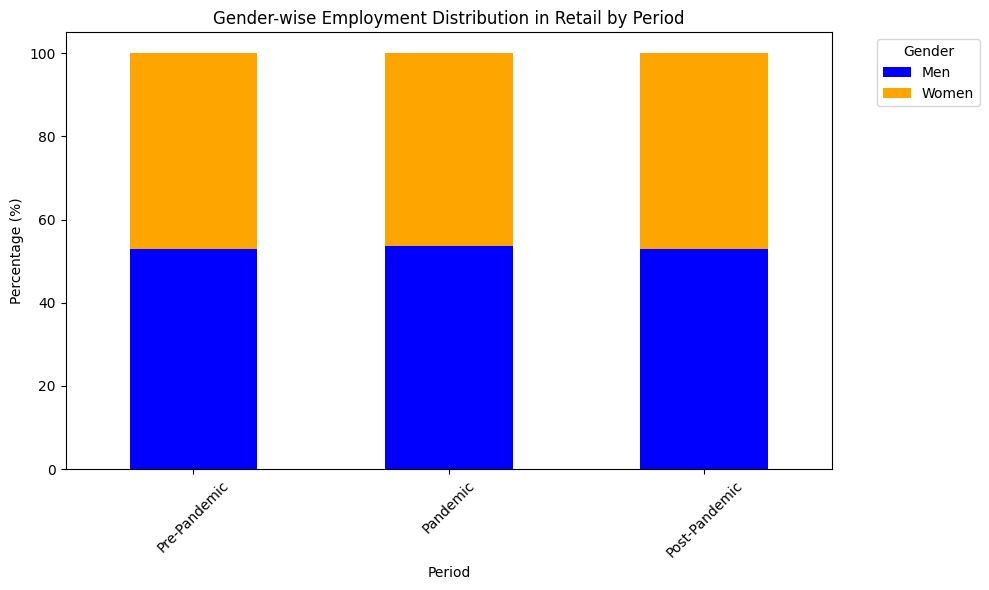

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

sector = 'Wholesale, retail & repair of motor vehicles'

men_retail = filtered_men_data[['Date', sector]].copy()
women_retail = filtered_women_data[['Date', sector]].copy()

men_retail[sector] = pd.to_numeric(men_retail[sector], errors='coerce')
women_retail[sector] = pd.to_numeric(women_retail[sector], errors='coerce')

# 1. Time Series Line Chart
plt.figure(figsize=(12, 6))
plt.plot(men_retail['Date'], men_retail[sector], marker='o', linestyle='--', label='Men')
plt.plot(women_retail['Date'], women_retail[sector], marker='o', linestyle='-', label='Women')
plt.title('Wholesale, retail & repair of motor vehicles Employment by Gender (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Employment (in Thousands)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Add "Period" column categorizing dates into Pre-Pandemic, Pandemic, Post-Pandemic
def categorize_period(date):
    if '2018' in date or '2019' in date:
        return 'Pre-Pandemic'
    elif '2020' in date or '2021' in date:
        return 'Pandemic'
    else:
        return 'Post-Pandemic'

men_retail['Period'] = men_retail['Date'].apply(categorize_period)
women_retail['Period'] = women_retail['Date'].apply(categorize_period)

men_grouped = men_retail.groupby('Period')[sector].sum()
women_grouped = women_retail.groupby('Period')[sector].sum()

# 2. Stacked Bar Chart
periods = ['Pre-Pandemic', 'Pandemic', 'Post-Pandemic']
employment_by_gender = pd.DataFrame({
    'Men': men_grouped.reindex(periods),
    'Women': women_grouped.reindex(periods)
})

employment_percentages = employment_by_gender.div(employment_by_gender.sum(axis=1), axis=0) * 100

ax = employment_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])
plt.title('Gender-wise Employment Distribution in Retail by Period')
plt.xlabel('Period')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [178]:
industries = [
    'Wholesale, retail & repair of motor vehicles',
    'Accommod-ation & food services',
    'Human health & social work activities', 
    'Manufacturing',
    'Education'
]


/var/folders/r9/6p4s_33n7f3gzzh0k0s6jqfw0000gn/T/ipykernel_70048/2322488228.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  men_grouped = filtered_men_data.groupby('Period')[industries].sum()
/var/folders/r9/6p4s_33n7f3gzzh0k0s6jqfw0000gn/T/ipykernel_70048/2322488228.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  women_grouped = filtered_women_data.groupby('Period')[industries].sum()


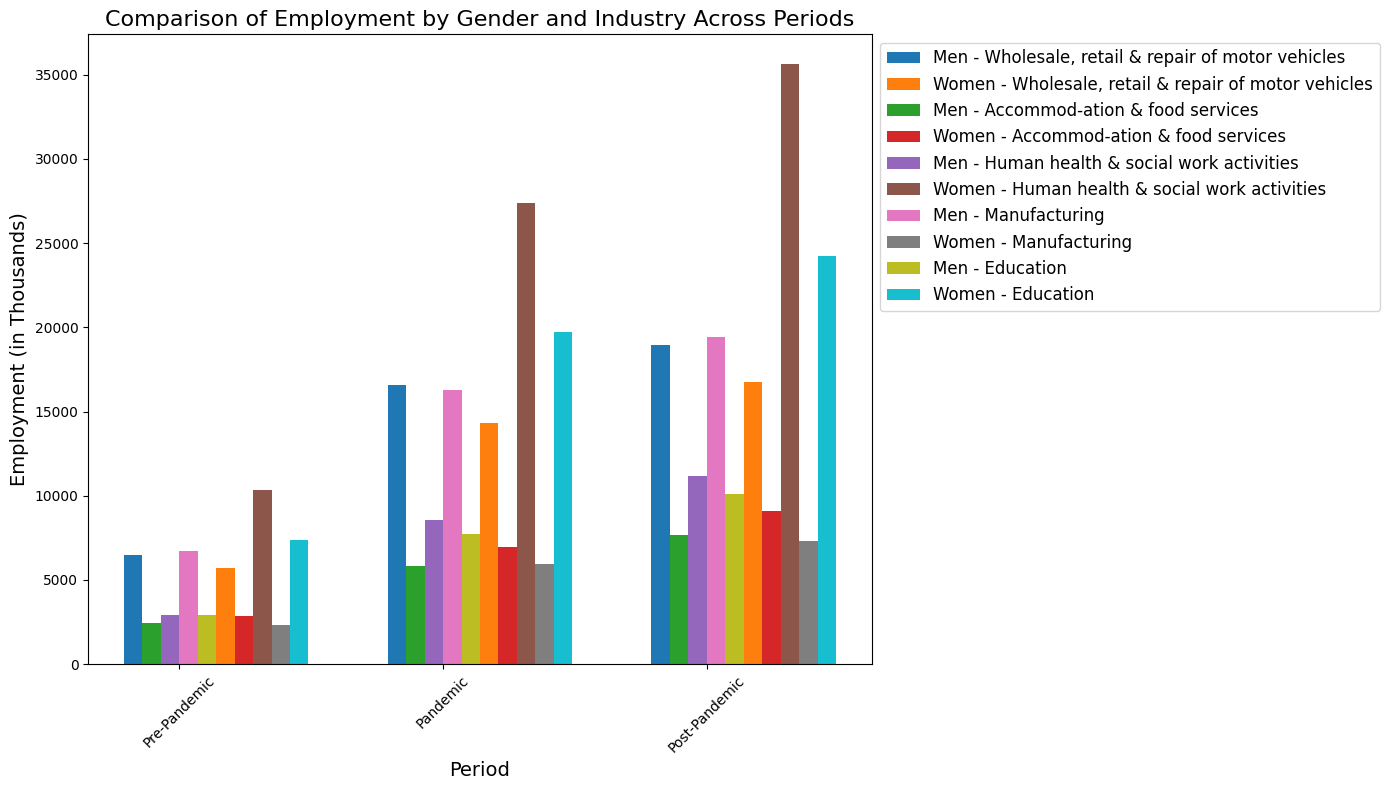

In [181]:
import matplotlib.pyplot as plt
import numpy as np

industries = [
    'Wholesale, retail & repair of motor vehicles',
    'Accommod-ation & food services',
    'Human health & social work activities',
    'Manufacturing',
    'Education'
]

men_grouped = filtered_men_data.groupby('Period')[industries].sum()
women_grouped = filtered_women_data.groupby('Period')[industries].sum()

periods = men_grouped.index
x = np.arange(len(periods)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(14, 8))

for i, industry in enumerate(industries):
    ax.bar(
        x - width / 2 + (i * width / len(industries)), 
        men_grouped[industry],
        width / len(industries),
        label=f'Men - {industry}'
    )
    ax.bar(
        x + width / 2 + (i * width / len(industries)),  
        women_grouped[industry],
        width / len(industries),
        label=f'Women - {industry}'
    )

ax.set_title("Comparison of Employment by Gender and Industry Across Periods", fontsize=16)
ax.set_xlabel("Period", fontsize=14)
ax.set_ylabel("Employment (in Thousands)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(periods, rotation=45)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.tight_layout()
plt.show()

In [182]:
men_grouped = filtered_men_data.groupby('Period', observed=False)[industries].sum()
women_grouped = filtered_women_data.groupby('Period', observed=False)[industries].sum()

In [183]:
def categorize_period(date):
    if "2018" in date or "2019" in date:
        return "Pre-Pandemic"
    elif "2020" in date or "2021" in date:
        return "Pandemic"
    elif "2022" in date or "2023" in date or "2024" in date:
        return "Post-Pandemic"
    else:
        return "Other"

In [184]:
filtered_men_data['Period'] = filtered_men_data['Date'].apply(categorize_period)
filtered_women_data['Period'] = filtered_women_data['Date'].apply(categorize_period)

In [189]:
period_order = ["Pre-Pandemic", "Pandemic", "Post-Pandemic"]

men_grouped = men_grouped.reindex(period_order)
women_grouped = women_grouped.reindex(period_order)


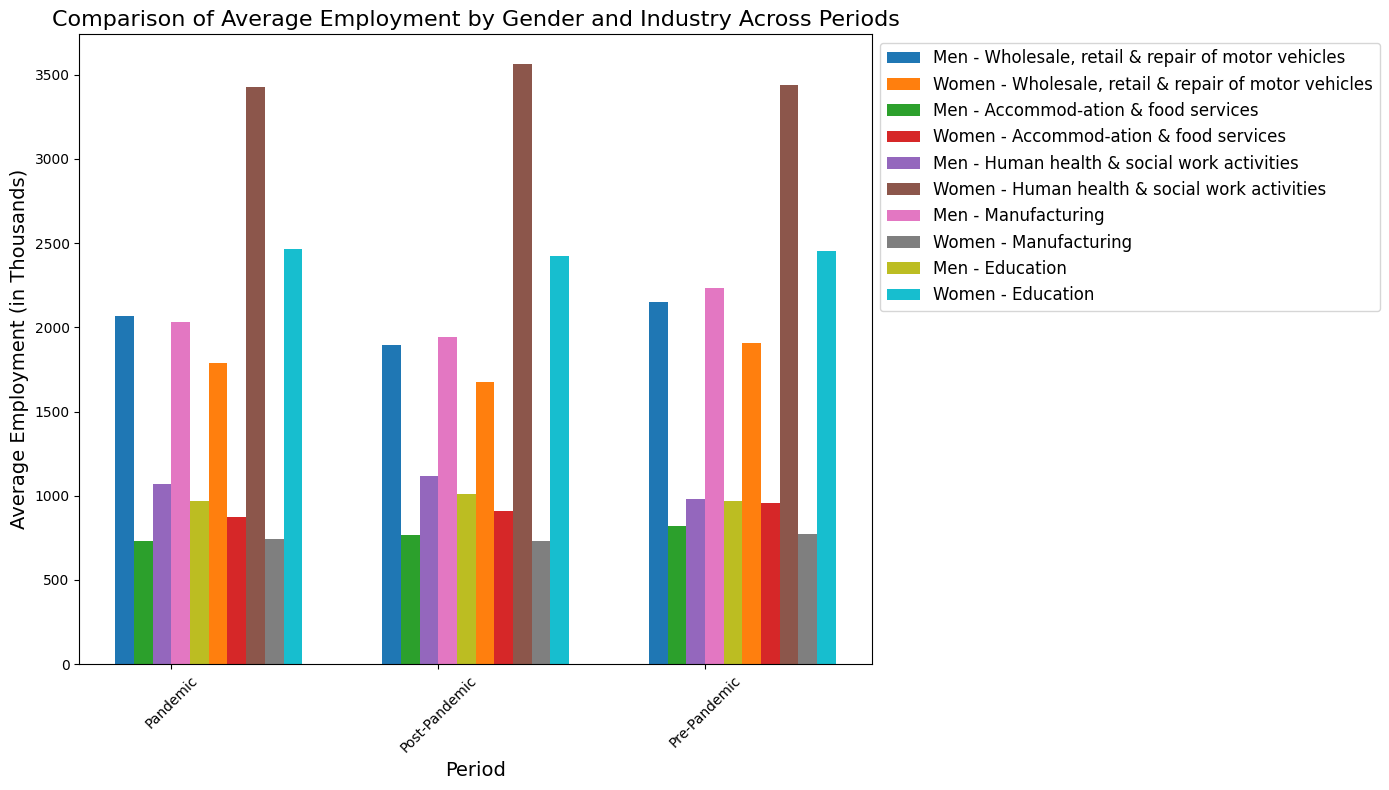

In [190]:
import matplotlib.pyplot as plt
import numpy as np

industries = [
    'Wholesale, retail & repair of motor vehicles',
    'Accommod-ation & food services',
    'Human health & social work activities',
    'Manufacturing',
    'Education'
]

men_grouped = filtered_men_data.groupby('Period')[industries].mean()
women_grouped = filtered_women_data.groupby('Period')[industries].mean()

periods = men_grouped.index
x = np.arange(len(periods)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(14, 8))

for i, industry in enumerate(industries):
    ax.bar(
        x - width / 2 + (i * width / len(industries)), 
        men_grouped[industry],
        width / len(industries),
        label=f'Men - {industry}'
    )
    ax.bar(
        x + width / 2 + (i * width / len(industries)),  
        women_grouped[industry],
        width / len(industries),
        label=f'Women - {industry}'
    )

ax.set_title("Comparison of Average Employment by Gender and Industry Across Periods", fontsize=16)
ax.set_xlabel("Period", fontsize=14)
ax.set_ylabel("Average Employment (in Thousands)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(periods, rotation=45)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.tight_layout()
plt.show()

In [191]:
import pandas as pd

men_employment_path = '/Users/zionlawrence/Documents/CFG_data_science_project/MEN employment by industry  - Men.csv'
women_employment_path = '/Users/zionlawrence/Documents/CFG_data_science_project/WOMEN employment by industry - Women.csv'

men_employment_data = pd.read_csv(men_employment_path)
women_employment_data = pd.read_csv(women_employment_path)

men_employment_data.rename(columns={men_employment_data.columns[0]: 'Date'}, inplace=True)
women_employment_data.rename(columns={women_employment_data.columns[0]: 'Date'}, inplace=True)

filtered_men_data = men_employment_data[
    men_employment_data['Date'].str.contains('2018|2019|2020|2021|2022|2023|2024', na=False)
]

filtered_women_data = women_employment_data[
    women_employment_data['Date'].str.contains('2018|2019|2020|2021|2022|2023|2024', na=False)
]

filtered_men_data.reset_index(drop=True, inplace=True)
filtered_women_data.reset_index(drop=True, inplace=True)

print("Filtered Men Employment Data:")
print(filtered_men_data.head())

print("\nFiltered Women Employment Data:")
print(filtered_women_data.head())

men_cleaned_path = '/Users/zionlawrence/Documents/CFG_data_science_project/filtered_men_employment_data.csv'
women_cleaned_path = '/Users/zionlawrence/Documents/CFG_data_science_project/filtered_women_employment_data.csv'

filtered_men_data.to_csv(men_cleaned_path, index=False)
filtered_women_data.to_csv(women_cleaned_path, index=False)

print("\nCleaned datasets have been saved:")
print(f"Men Employment Data: {men_cleaned_path}")
print(f"Women Employment Data: {women_cleaned_path}")

Filtered Men Employment Data:
           Date Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0  Jan-Mar 2018     17,080      2,385     14,633        253        473   
1  Apr-Jun 2018     17,117      2,340     14,715        260        480   
2  Jul-Sep 2018     17,252      2,383     14,811        244        463   
3  Oct-Dec 2018     17,332      2,424     14,855        248        473   
4  Jan-Mar 2019     17,228      2,400     14,771        242        444   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0      2,197      2,036      2,277      1,254         798         928   
1      2,149      2,048      2,266      1,296         830         939   
2      2,163      2,058      2,260      1,282         849         945   
3      2,186      2,104      2,221      1,283         825         940   
4      2,198      2,124      2,182      1,253         806         955   

  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17  \
0        